# Frequencies Spectra for Individual Particles

In [1]:
import numpy as np
import math
import pandas as pd
import trackpy as tp
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [44]:
roi_size = 20.0
roi_center_x = 776.0
roi_center_y = 597.0
fps = 99.0
infname = r'position_V140_20230827noTiff'
outfname = r'V140_p'

In [5]:
#folderPath = r'G:\My Drive\workAppState\prj_shocks\expData\data_phonon_spectrum\data_set1\analyzed\103Vbias\20230727spectra\04_an_frequenciesSpectra'
#folderPath = r'g:\My Drive\workAppState\prj_shocks\expData\data_phonon_spectrum\data_set1\analyzed\103Vbias\20230822spectra\04_an_frequenciesSpectra'
#folderPath = r'G:\My Drive\workAppState\prj_shocks\expData\data_phonon_spectrum\data_set1\analyzed\110Vbias\20230822spectra\04_an_frequenciesSpectra'
#folderPath = r'G:\My Drive\workAppState\prj_shocks\expData\data_phonon_spectrum\data_set1\analyzed\120Vbias\20230824spectra\04_an_frequenciesSpectra'
folderPath = r'G:\My Drive\workAppState\prj_shocks\expData\data_phonon_spectrum\data_set1\analyzed\140Vbias\20230827spectra\04_an_frequenciesSpectra'

In [6]:
#pos_filepath = folderPath + r'\inputs' + r'\position_noTiff.txt'
#pos_filepath = folderPath + r'\inputs' + r'\position_103V_20230822NoTiff.txt'
#pos_filepath = folderPath + r'\inputs' + r'\position_110V_20230823NoTiff.txt'
#pos_filepath = folderPath + r'\inputs' + r'\position_V120_20230824NoTiff.txt'
pos_filepath = folderPath + r'\inputs' + r'\position_V140_20230827noTiff.txt'

In [7]:
col_names = [r'particle_notrack',r'frame',r'x',r'y']

In [8]:
df_pos = pd.read_csv(pos_filepath, header = None, names = col_names)

In [9]:
df_pos.head()

,particle_notrack,frame,x,y
0,1,0,828.282,308.039
1,2,0,833.014,340.926
2,3,0,889.781,346.256
3,4,0,804.944,350.327
4,5,0,874.533,350.500


In [10]:
#cacluate CM of particle cloud for each frame:

In [11]:
df_cm = df_pos.groupby('frame')[['x','y']].mean().reset_index()
df_cm.columns = ['frame', 'x_CM', 'y_CM']

In [12]:
df_pos = df_pos.merge(df_cm, on = 'frame', how = 'left')
df_pos.head()

,particle_notrack,frame,x,y,x_CM,y_CM
0,1,0,828.282,308.039,842.719375,602.888593
1,2,0,833.014,340.926,842.719375,602.888593
2,3,0,889.781,346.256,842.719375,602.888593
3,4,0,804.944,350.327,842.719375,602.888593
4,5,0,874.533,350.500,842.719375,602.888593


In [13]:
df_linked = tp.link(df_pos, 5.0, memory = 0)

Frame 823: 2482 trajectories present.


In [14]:
df_linked.head()

,particle_notrack,frame,x,y,x_CM,y_CM,particle
0,1,0,828.282,308.039,842.719375,602.888593,0
1656,1657,0,996.445,661.091,842.719375,602.888593,1
1657,1658,0,1036.920,661.274,842.719375,602.888593,2
1658,1659,0,1061.324,661.832,842.719375,602.888593,3
1659,1660,0,1106.395,661.150,842.719375,602.888593,4


In [15]:
df_oneframe_check = df_pos[df_pos['frame'] == 333]

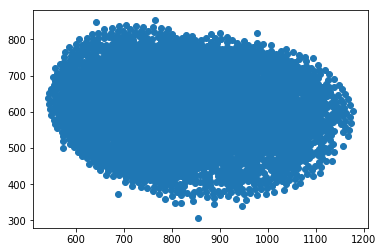

In [16]:
fig, ax = plt.subplots()
ax.scatter(df_oneframe_check['x'], df_oneframe_check['y'])

In [17]:
roi_condition = ((df_linked['x'] < roi_center_x + roi_size) &
                 (df_linked['y'] < roi_center_y + roi_size) & 
                 (df_linked['y'] > roi_center_y - roi_size) & 
                 (df_linked['y'] > roi_center_y - roi_size))

In [18]:
df_roi = df_linked[roi_condition]

In [19]:
df_roi.size

683375

In [20]:
df_linked.size

14343826

In [21]:
particles_listing = np.unique(df_roi['particle'])

In [22]:
type(particles_listing)

numpy.ndarray

In [23]:
particles_listing

array([  313,   314,   315,   319,   328,   329,   330,   332,   333,
         334,   335,   337,   338,   339,   344,   345,   346,   390,
         391,   399,   400,   401,   403,   404,   405,   406,   407,
         408,   411,   412,   413,   414,   415,   416,   424,   428,
         433,   434,   440,   447,   448,   449,   454,   456,   457,
         462,   463,   464,  1875,  1876,  1877,  1878,  1885,  1886,
        1894,  1896,  1907,  1909,  1910,  1919,  1920,  1930,  1931,
        1935,  1937,  1938,  1939,  1940,  1941,  1942,  1945,  1994,
        2024,  2025,  2027,  2028,  2029,  2034,  2035,  2036,  2037,
        2044,  2045,  2059,  2060,  2061,  2062,  2064,  2065,  2066,
        2071,  2072,  2080,  2084,  2088,  2089,  2090,  2092,  2095,
        2096,  2097,  2098,  2099,  2101,  2102,  2103,  2104,  2111,
        2112,  2113,  2114,  2119,  2123,  2124,  2125,  2130,  2132,
        2136,  2137,  2139,  2140,  2141,  2149,  2150,  2151,  2153,
        2154,  2157,

In [24]:
len(particles_listing)

237

In [25]:
traj_test = df_roi[df_roi['particle'] == 113]

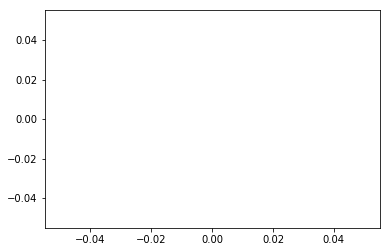

In [26]:
fig, ax = plt.subplots()
ax.plot(traj_test['x'], traj_test['y'])


In [27]:
arr_traj_lengths = np.empty(len(particles_listing))

In [28]:
for i in range(0, len(particles_listing)):
    cur_len = len(df_roi[df_roi['particle'] == particles_listing[i]])
    arr_traj_lengths[i] = cur_len
               

In [29]:
np.max(arr_traj_lengths)

824.0

In [30]:
pd_traj_len = pd.DataFrame({'particle':particles_listing, 'tr_len':arr_traj_lengths})

In [31]:
pd_traj_len.head()

,particle,tr_len
0,313,77.0
1,314,365.0
2,315,301.0
3,319,380.0
4,328,7.0


In [32]:
pd_traj_len.sort_values(by = 'tr_len', ascending = False, inplace = True)

In [33]:
pd_traj_len.head(20)

,particle,tr_len
118,2137,824.0
70,1945,824.0
82,2045,824.0
81,2044,824.0
79,2036,824.0
77,2034,824.0
76,2029,824.0
75,2028,824.0
74,2027,824.0
73,2025,824.0


In [36]:
traj_test = df_roi[df_roi['particle'] == 2137].copy()
N = len(traj_test['x'])

In [37]:
traj_test['x_rfcm'] = traj_test['x'] - traj_test['x_CM'] 
traj_test['y_rfcm'] = traj_test['y'] - traj_test['y_CM'] 
traj_test.head()

,particle_notrack,frame,x,y,x_CM,y_CM,particle,x_rfcm,y_rfcm
1105,1106,0,723.371,585.481,842.719375,602.888593,2137,-119.348375,-17.407593
3591,3592,1,723.220,585.400,842.205565,602.774995,2137,-118.985565,-17.374995
6077,6078,2,723.186,585.333,843.185703,602.101039,2137,-119.999703,-16.768039
8548,8549,3,723.224,585.078,842.934797,604.093371,2137,-119.710797,-19.015371
11043,11044,4,723.363,584.894,843.298276,603.740439,2137,-119.935276,-18.846439


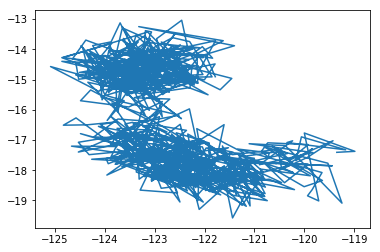

In [38]:

fig, ax = plt.subplots()
ax.plot(traj_test['x_rfcm'], traj_test['y_rfcm'])

In [47]:
def get_spectrum_drift(arr_t, arr_sig):
    slope, intercept = np.polyfit(arr_t, arr_sig, 1)
    arr_sig_nodrift = arr_sig - (slope * arr_t + intercept)
    arr_intens = np.fft.fft(arr_sig_nodrift)
    dt = arr_t[1] - arr_t[0]
    N = len(arr_t)
    #print(N)
    arr_freqs = np.fft.fftfreq(N, dt)[:N//2]    
    return arr_freqs, arr_intens

In [40]:
def get_spectrum(arr_t, arr_sig):
    arr_sig_nomean = arr_sig - np.mean(arr_sig)
    arr_intens = np.fft.fft(arr_sig_nomean)
    dt = arr_t[1] - arr_t[0]
    N = len(arr_t)
    arr_freqs = np.fft.fftfreq(N, dt)[:N//2]    
    return arr_freqs, arr_intens

In [41]:
arr_p = np.array(pd_traj_len['particle'])

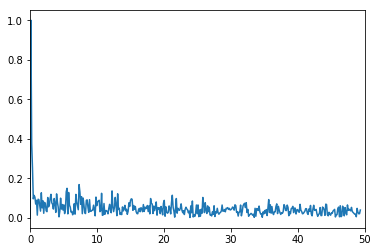

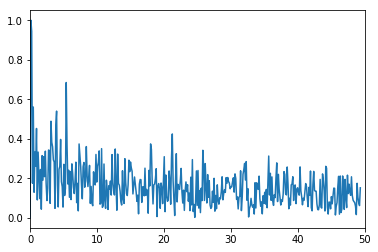

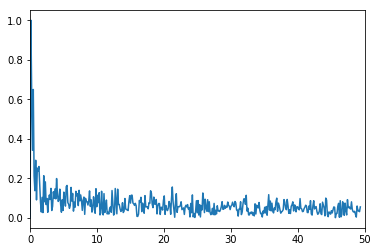

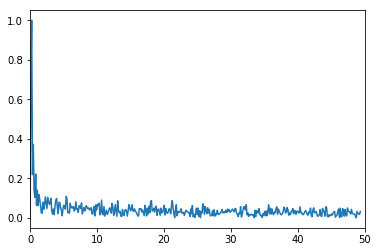

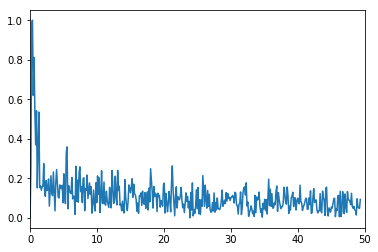

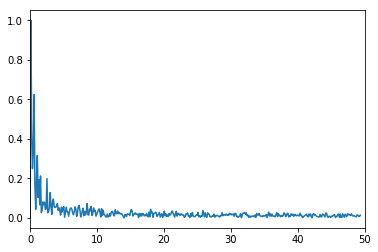

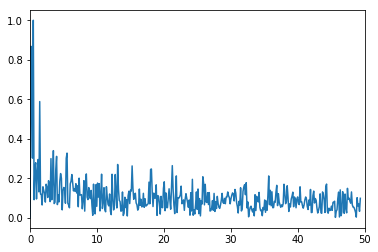

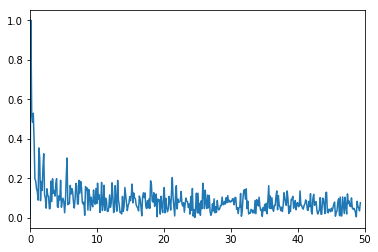

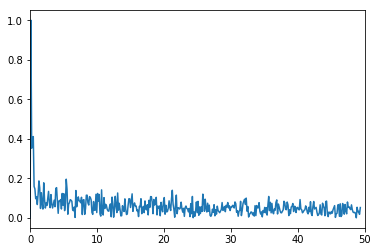

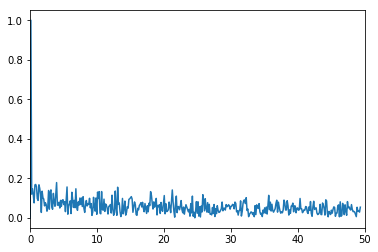

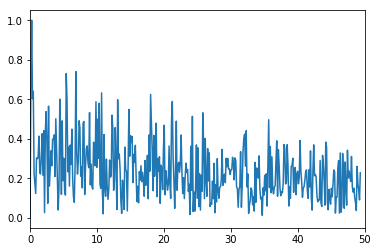

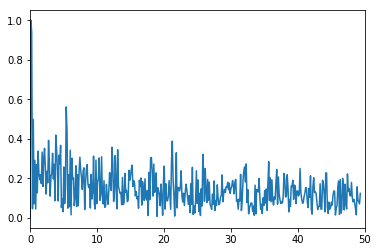

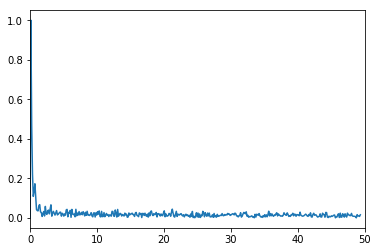

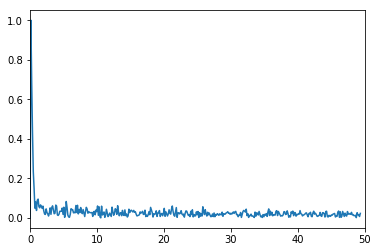

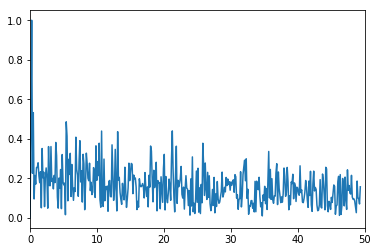

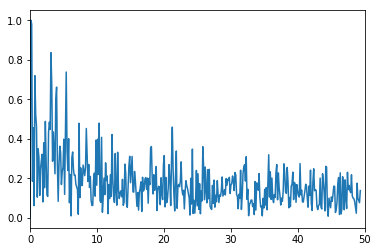

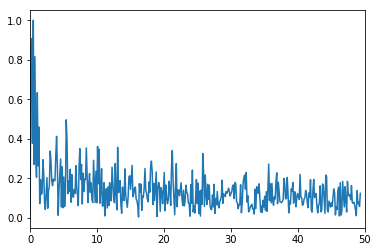

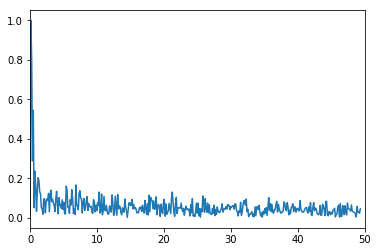

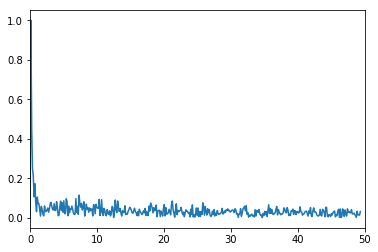

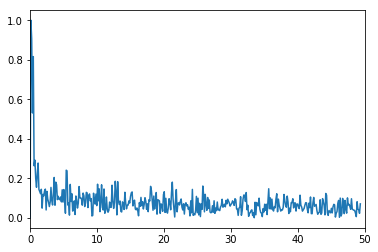

In [53]:
for i in range(0,20):
    traj_i = df_roi[df_roi['particle'] == arr_p[i]].copy()
    N = len(traj_i['x'])
    traj_i['x_rfcm'] = traj_i['x'] - traj_i['x_CM']
    traj_i['y_rfcm'] = traj_i['y'] - traj_i['y_CM']
    arr_time_i = np.linspace(0.0, 1.0 / fps * N, N)
    arr_freqs_i, arr_intens_i = get_spectrum_drift(arr_time_i, traj_i['x_rfcm'])
    fig_i, ax_i = plt.subplots()
    ax_i.set_xlim(0, 50)
    arr_abs_intens = 2.0 / N * np.abs(arr_intens_i[0:N//2])
    arr_norm_intens = ((arr_abs_intens - np.min(arr_abs_intens)) / 
                      (np.max(arr_abs_intens) - np.min(arr_abs_intens)))
    #arr_savg = savgol_filter(arr_abs_intens, 3, 2)
    ax_i.plot(arr_freqs_i, arr_norm_intens)
    
    

824
824
824
824
824
824
824
824
824
824
824
824
824
824
824
824
824
824
824
824


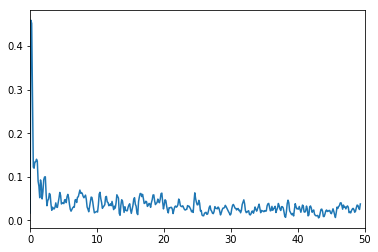

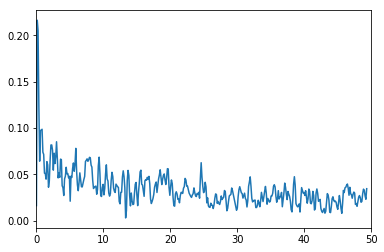

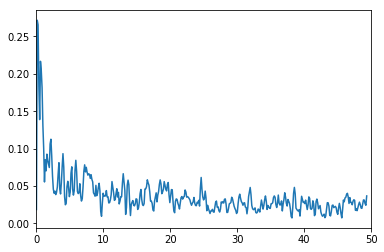

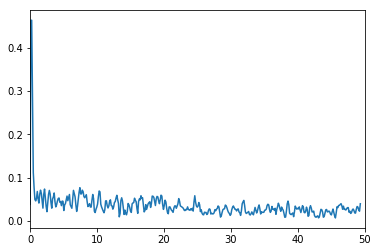

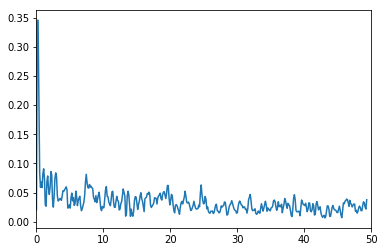

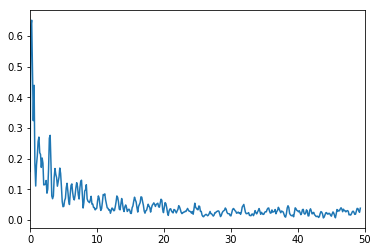

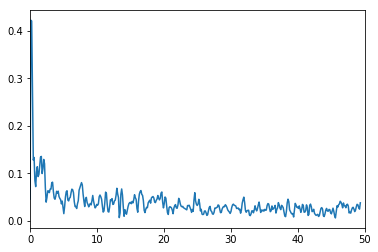

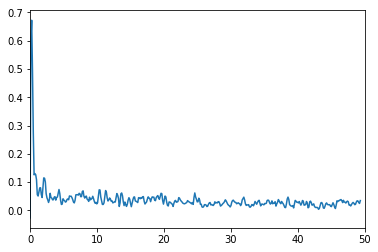

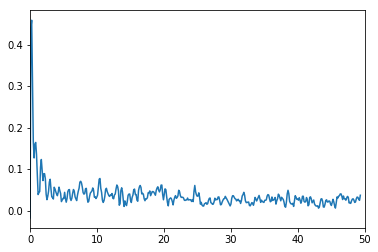

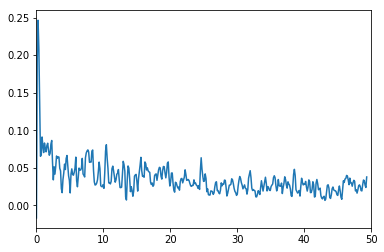

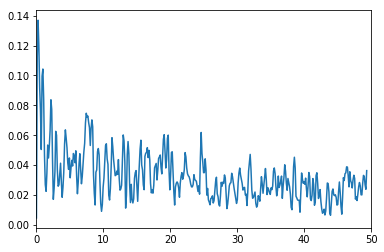

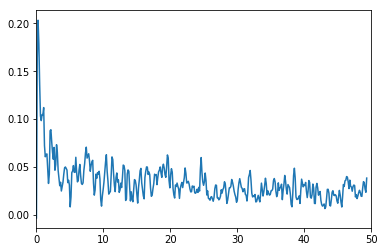

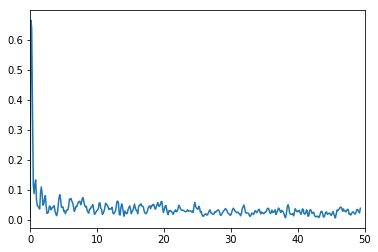

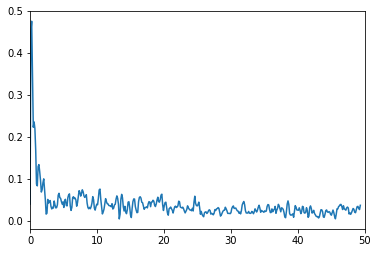

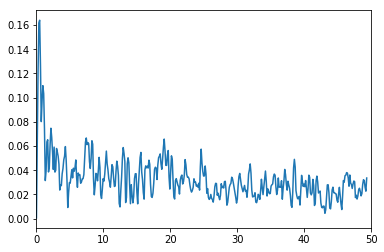

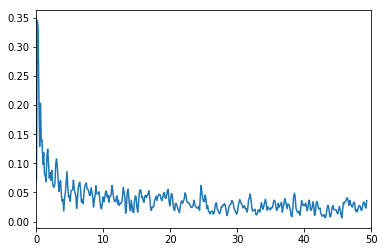

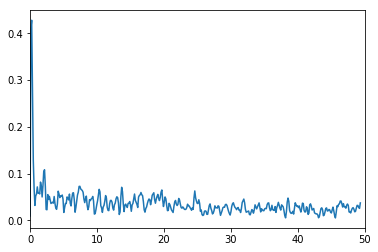

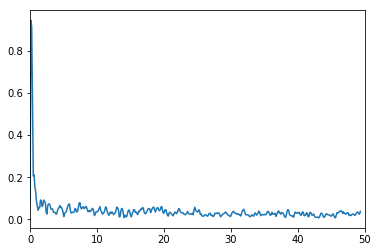

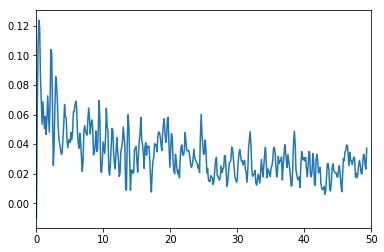

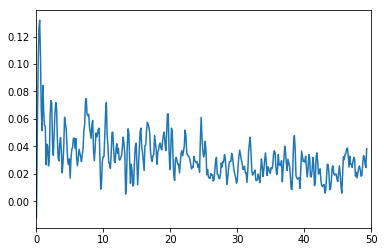

In [46]:
for i in range(0,20):
    traj_i = df_roi[df_roi['particle'] == arr_p[i]].copy()
    N = len(traj_i['x'])
    traj_i['x_rfcm'] = traj_i['x'] - traj_i['x_CM']
    traj_i['y_rfcm'] = traj_i['y'] - traj_i['y_CM']
    arr_time_i = np.linspace(0.0, 1.0 / fps * N, N)
    arr_freqs_i, arr_intens_i = get_spectrum_drift(arr_time_i, traj_i['y_rfcm'])
    fig_i, ax_i = plt.subplots()
    ax_i.set_xlim(0, 50)
    arr_abs_intens = 2.0 / N * np.abs(arr_intens_i[0:N//2])
    arr_savg = savgol_filter(arr_abs_intens, 9, 4)
    ax_i.plot(arr_freqs_i, arr_savg)